# Heart Failure Prediction

Dataset sourced from https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

### Data Loading

In [3]:
import pandas as pd

# Load in the CSV content to a pandas dataframe
df = pd.read_csv("heart.csv")
print(df.head(5)) # Look at the contents

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


### Exploratory Data Analysis

In [23]:
# Analysing the desciptive satistics of the dataframe columns

for column in df:
    desc = df[column].describe()
    print(f"\nColumn: {column}")
    print("=" * (8 + len(column)))
    for stat in desc.index:
        print(f"{stat: <10}: {desc[stat]: >10}")


Column: Age
count     :      918.0
mean      : 53.510893246187365
std       : 9.43261650673201
min       :       28.0
25%       :       47.0
50%       :       54.0
75%       :       60.0
max       :       77.0

Column: Sex
count     :        918
unique    :          2
top       :          M
freq      :        725

Column: ChestPainType
count     :        918
unique    :          4
top       :        ASY
freq      :        496

Column: RestingBP
count     :      918.0
mean      : 132.39651416122004
std       : 18.5141541199078
min       :        0.0
25%       :      120.0
50%       :      130.0
75%       :      140.0
max       :      200.0

Column: Cholesterol
count     :      918.0
mean      : 198.7995642701525
std       : 109.38414455220348
min       :        0.0
25%       :     173.25
50%       :      223.0
75%       :      267.0
max       :      603.0

Column: FastingBS
count     :      918.0
mean      : 0.23311546840958605
std       : 0.423045624739303
min       :        0.0
25%  

In [26]:
# Checking for nulls

print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


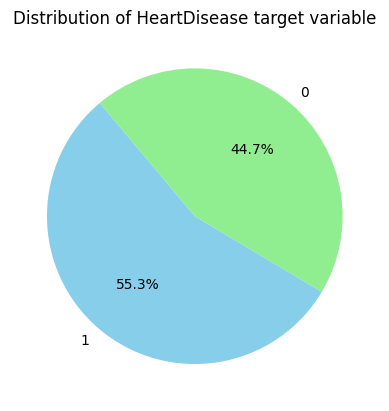

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyse the distribution of the target variable (HeartDisease)
proportion = df["HeartDisease"].value_counts(normalize=True)
proportion.plot(kind="pie",  autopct='%1.1f%%', startangle=130, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title("Distribution of HeartDisease target variable")
plt.ylabel("")
plt.show()


Over 50% of the sample have heart disease.

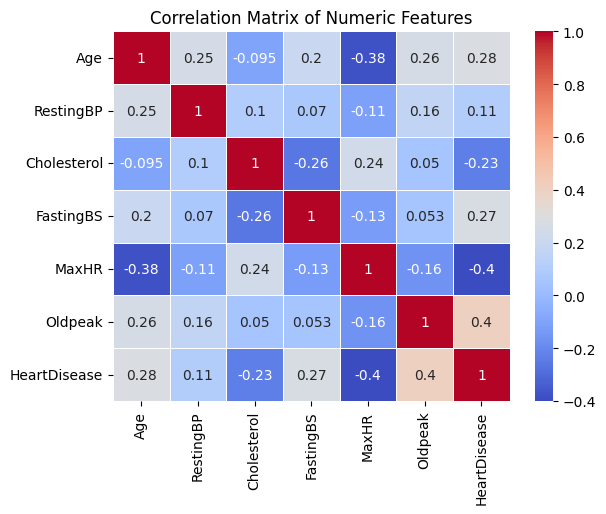

In [28]:
# Analyse the correlation coefficients between the features and the target variable

correlation = df.corr(numeric_only=True)

sns.heatmap(correlation, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

No numeric features are strongly correlated with eachother enough to cause any concern.

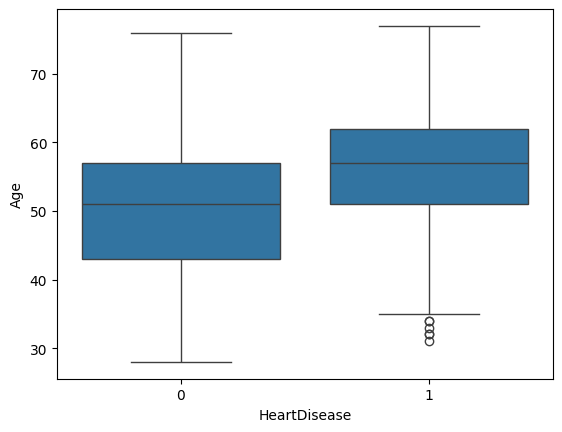

In [30]:
# Analysing relationships between features and target

sns.boxplot(x="HeartDisease", y="Age", data=df)
plt.title("Box Plot of Age against HeartDisease")
plt.show()

The above shows that on average, individuals with heart disease are typically older, and the minimum age of any person with heart disease is older than the youngest person in the sample who does not have heart disease. There are also a few outliers of individuals with heart disease who are younger than expected.